# Student Performance
This project analyzes student performance data using exploratory data analysis and linear regression. The goal is to examine relationships between study hours, attendance, and overall academic performance, and to build a basic predictive model.



## 1-Setup

Import the basic libraries needed for:
- loading and exploring the dataset (pandas)
- creating plots (matplotlib)
- building a simple regression model (scikit-learn)

We also hide warning messages to keep the notebook output clean.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## 2-Load the dataset

We load the dataset into a DataFrame (`df`) so we can inspect rows, columns, and values easily.


In [72]:
import os
import pandas as pd

DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

DATA_URL = "https://raw.githubusercontent.com/JayasreeMeda/StudentPerformace/refs/heads/main/Student_Performance.csv"
DATA_PATH = os.path.join(DATA_DIR, "Student_Performance.csv")

df = pd.read_csv(DATA_URL)
df.to_csv(DATA_PATH, index=False)

## 3-Quick preview

Let’s view the first few rows to understand what each record (row) represents and what kind of values each column contains.


In [ ]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


## 4-Gender distribution (basic demographic check)

Count how many students belong to each gender category.
This is a quick way to understand dataset balance.


In [ ]:
df['gender'].value_counts()

,count
gender,
other,8463
female,8290
male,8247


## 5-Dataset size

Check how many rows (students) and columns (features) exist in the dataset.


In [ ]:
df.shape

(25000, 16)

## 6-Column names

List all column names to understand what information is available (demographics, study habits, scores, grades, etc.).


In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')

## 7-Dataset structure

View column data types and confirm there are no missing values.
This ensures the dataset is ready for beginner-level analysis.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

## 8-Summary statistics (numerical columns)

Get basic statistics (mean, min, max, quartiles) for numeric columns like scores, study hours, and attendance.


In [ ]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 9-Overall score distribution

A histogram to see how **overall_score** is distributed across students.
This helps us understand the general performance range.


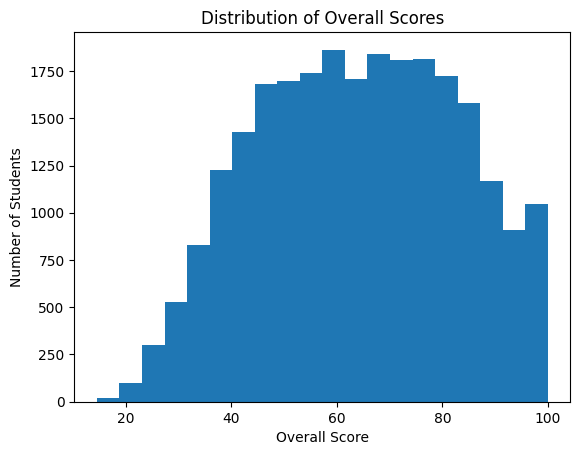

In [ ]:
plt.hist(df["overall_score"], bins=20)
plt.xlabel("Overall Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Overall Scores")
plt.show()

## 10-Subject-wise Score Distributions

The following histograms show how students perform across the three core subjects:
- **Math**
- **Science**
- **English**

Each histogram visualizes the distribution of scores for the respective subject, helping us understand overall performance patterns and score variability across subjects.


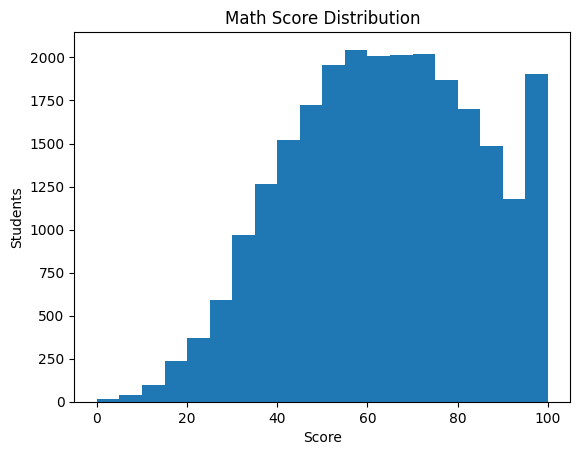

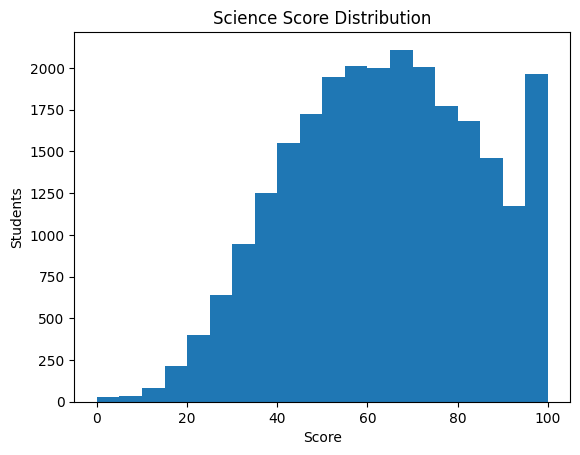

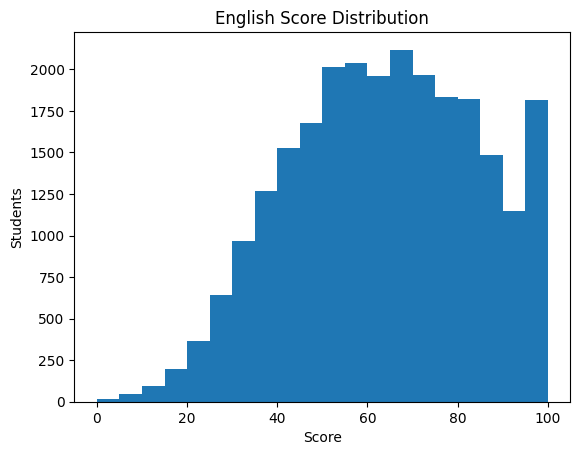

In [ ]:
plt.hist(df["math_score"], bins=20)
plt.title("Math Score Distribution")
plt.xlabel("Score")
plt.ylabel("Students")
plt.show()

plt.hist(df["science_score"], bins=20)
plt.title("Science Score Distribution")
plt.xlabel("Score")
plt.ylabel("Students")
plt.show()

plt.hist(df["english_score"], bins=20)
plt.title("English Score Distribution")
plt.xlabel("Score")
plt.ylabel("Students")
plt.show()


## 11-School type distribution

Compare the number of students from **public vs private** schools.
This is a simple categorical summary plot.


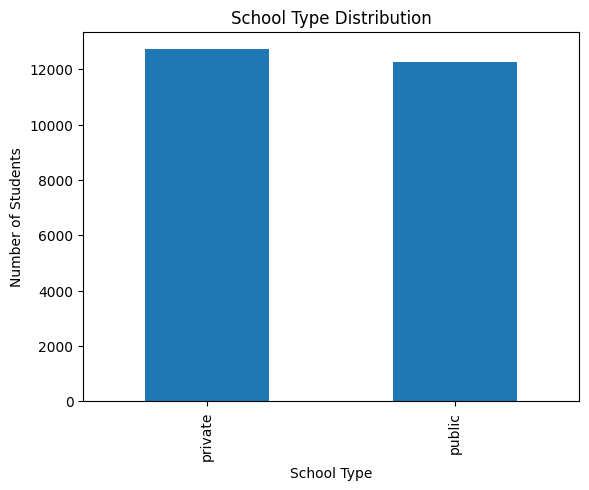

In [ ]:
df["school_type"].value_counts().plot(kind="bar")
plt.xlabel("School Type")
plt.ylabel("Number of Students")
plt.title("School Type Distribution")
plt.show()


## 12-Final grade distribution

Visualize how students are distributed across final grades (A, B, C, …).
This summarizes outcomes at a high level.


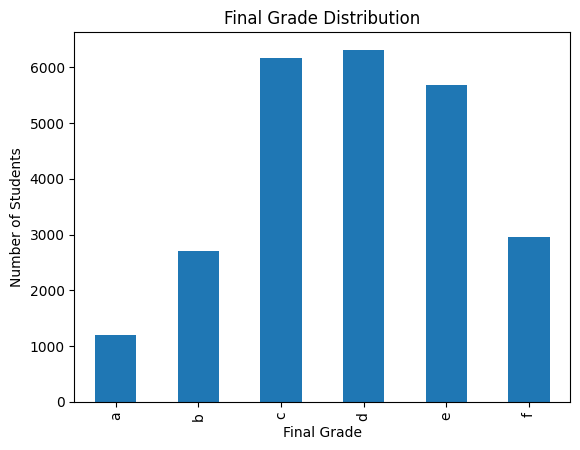

In [ ]:
df["final_grade"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.title("Final Grade Distribution")
plt.show()


## 13-Build a simple regression dataset

We choose two beginner-friendly input features:
- `study_hours`
- `attendance_percentage`

Target variable:
- `overall_score`

Goal: predict a student’s overall score using study and attendance.


In [ ]:
X = df[["study_hours", "attendance_percentage"]]
y = df["overall_score"]

## 14-Train/Test split

Split the dataset into:
- **training set** (to learn the relationship)
- **test set** (to evaluate on unseen data)

This helps us avoid testing on the same data we trained on.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 15-Train a Linear Regression model

Train a **LinearRegression** model on the training data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 16-Make predictions

Use the trained model to predict `overall_score` values for the test set.


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([83.27178447, 47.32488503, 63.13931848, 44.29293482, 44.44867067])

## 17-Model evaluation (R² score)

Compute the R² score to measure how well the model explains variation in overall scores.
Higher is better (closer to 1.0).


In [ ]:
r2_score(y_test, y_pred)

0.9080042444683526

## 18-Model Coefficients

This cell displays the learned coefficients of the linear regression model.
Each value represents how much the overall score changes when the corresponding feature increases by one unit.


In [ ]:
model.coef_

array([7.92416585, 0.39197101])

## 19-Model Intercept

The intercept represents the baseline predicted score when all input features are zero.
It is part of the linear regression equation.


In [ ]:
model.intercept_

np.float64(0.8551427323030367)

## 20-Making a Sample Prediction

Here, the trained model is used to predict the overall score for a student who studies for 5 hours and has 85% attendance.
This demonstrates how the model can be used for real-world predictions.


In [ ]:
model.predict([[5, 85]])

array([73.79350799])